In [76]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
import warnings
warnings.filterwarnings('ignore')

In [77]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,charged_cost,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,24.600000,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,10.504348,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,10.634783,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,23.360000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,10.078261,49


In [80]:
#Question 1:

import pandas as pd

# Assuming the CSV file is in the root of your Google Drive
csv_path = '/content/drive/My Drive/foodhub_order.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows to verify the data has been loaded
print(df.head())

# Optionally, you can get some basic info about the dataset
print(df.info())

#Observations: There are 9 total data columns.

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24  
<class 'pandas.core.frame.DataFr

In [81]:
#Question 2:

column_types = list(zip(df.columns,df.dtypes))
for column, dtype in column_types:
  print(f"{column}:{dtype}")

  #Observations: There are 9 different datatypes: order ID, customer ID, restaurant name, cuisine type, cost of the order,
  # day of the week, rating, food preparation time, and delivery time.

order_id:int64
customer_id:int64
restaurant_name:object
cuisine_type:object
cost_of_the_order:float64
day_of_the_week:object
rating:object
food_preparation_time:int64
delivery_time:int64


In [82]:
#Question 3:

#Count missing values for each column
missing_data = df.isnull().sum()
#Filter to show only columns with missing values
missing_columns = missing_data[missing_data>0]
print(missing_columns)

#Observations: there are 736 missing values in the dataframe.


Series([], dtype: int64)


In [83]:
#Question 4:

# Calculate the minimum of food_preparation_time
minimum = df['food_preparation_time'].min()
print(f'The minimum of food_preparation_time is {minimum}')

num=df['food_preparation_time'].count()
total=df['food_preparation_time'].sum()
average= total/num
print(f'average {average}')

# Calculate the maximum of food_preparation_time
maximum = df['food_preparation_time'].max()
print(f'The maximum of food_preparation_time is {maximum}')

#Observations: The minimum time it takes for the food to be prepared once an order is placed is: 20 minutes.
#The average time is: 27.371970495258168
#The maximum time is: 35

The minimum of food_preparation_time is 20
average 27.371970495258168
The maximum of food_preparation_time is 35


In [84]:
#Question 5:

# Replace Not given with NaN
#print(df['rating'].min())
# Replace the placeholder with NaN
df['rating'].replace(-999, np.nan, inplace=True)
df['rating'].replace('Not given', np.nan, inplace=True)

# Check for missing values in a specific column (e.g., rating)
missing_values_rating = df['rating'].isna().sum()
print(f'The number of missing values in rating is {missing_values_rating}')

#Observations: The number of orders not rated is 736.

The number of missing values in rating is 736


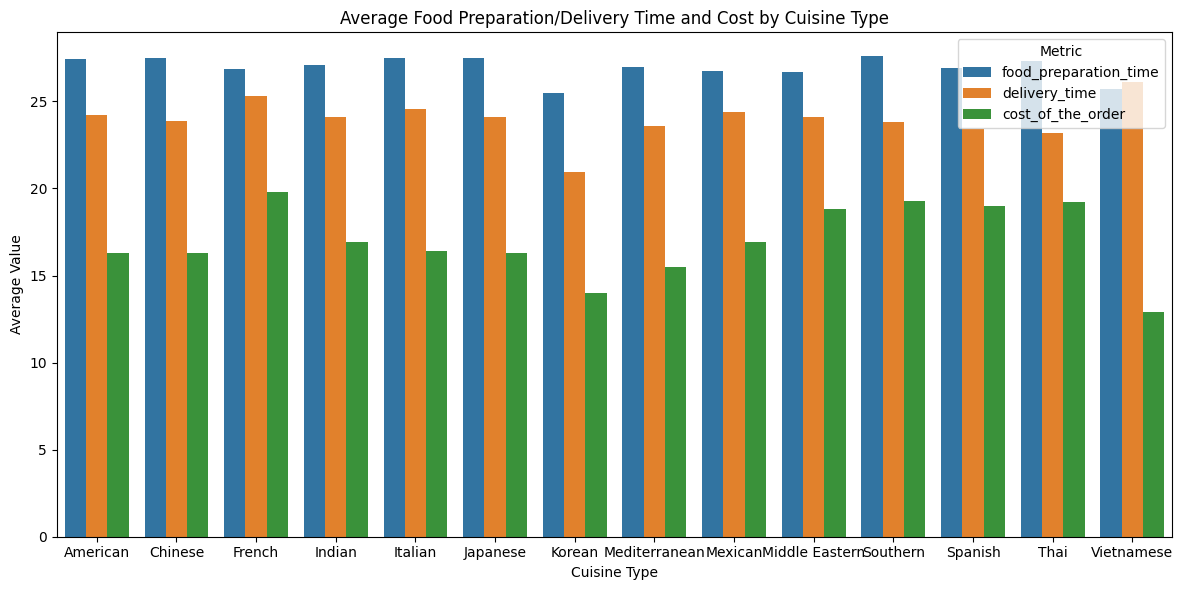

In [85]:
#Question 6:

# Create a Bar plot grouped by cuisine_type based on mean data in the DataFrame

# Group by cuisine type to get average preparation time and cost
grouped_data = df.groupby('cuisine_type').agg({
    'food_preparation_time': 'mean',
    'delivery_time': 'mean',
    'cost_of_the_order': 'mean'
}).reset_index()

# Melt the DataFrame to prepare for plotting with seaborn
df_melted = pd.melt(grouped_data, id_vars='cuisine_type', var_name='variable', value_name='value')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='cuisine_type', y='value', hue='variable', data=df_melted)

plt.title('Average Food Preparation/Delivery Time and Cost by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Value')
plt.legend(title='Metric')
plt.tight_layout()

plt.show()

#Observations: The food preparation time is fairly consistent across the different cuisine types. The delivery time is also
#consistent within the data. The cost of the orders varies between 10$ between the different cuisine types.

In [86]:
#Question 7:

# Count the occurrences of each restaurant_name
restaurant_counts = df['restaurant_name'].value_counts()
# Get the top five most used restaurants
top_five_restaurants = restaurant_counts.head(5)
print(top_five_restaurants)

#Observations: The top five restaurants are:
# 1) Shake Shack
# 2) The Meatball Shop
# 3) Blue Ribbon Sushi
# 4) Blue Ribbon Fried Chicken
# 5) Parm

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64


In [87]:
#Question 8:

#Count the occurences of cuisine_type on day_of_the_week
weekend_data = df[df['day_of_the_week'] == 'Weekend']
#Get the top cuisine_type ordered on weekends
top_cuisine_type = weekend_data['cuisine_type'].value_counts().head(1)
print(top_cuisine_type)

#Observations: The most popular cuisine on weekends is American cuisine.

cuisine_type
American    415
Name: count, dtype: int64


In [88]:
#Question 9:

# Filter the DataFrame to include only orders that cost more than 20 dollars
orders_above_20 = df[df['cost_of_the_order'] > 20]
# Calculate the percentage of orders that cost more than 20 dollars
percentage_above_20 = (len(orders_above_20) / len(df)) * 100
print(f'The percentage of orders that cost more than 20 dollars is {percentage_above_20:.2f}%')

#Observations: The percentage of orders that cost more than 20$ is 29.24%.

The percentage of orders that cost more than 20 dollars is 29.24%


In [89]:
#Question 10:

#The mean delivery time
print(df['delivery_time'].mean())

#Observations: The average time of delivery for orders is a little bit over 24 minutes.

24.161749209694417


In [90]:
#Question 11:

#Top three most frequent customers
top3 = df['customer_id'].value_counts()
print(top3.head(3))

#Observations: The top 3 customers order IDs are:
#52832 with 13 orders
# 47440 with 10 orders
# 83287 with 9 orders

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


In [91]:
#Question 12 numerical variable relations:

# Convert 'rating' to numeric, handling 'Not given' as NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Since 'customer_id', 'restaurant_name', 'cuisine_type', and 'day_of_the_week' are not numeric,
# we'll select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number']).columns

# Compute the correlation matrix
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

#Observations:
#The closer to 1 the value the higher the correlation is between the two fields.
#The two closest correlations are between cost_of_order and food_preparation_time.

                       order_id  customer_id  cost_of_the_order    rating  \
order_id               1.000000    -0.013960           0.021171  0.006308   
customer_id           -0.013960     1.000000          -0.001322  0.007753   
cost_of_the_order      0.021171    -0.001322           1.000000  0.033983   
rating                 0.006308     0.007753           0.033983  1.000000   
food_preparation_time -0.007026    -0.030330           0.041527 -0.006083   
delivery_time          0.009690    -0.009885          -0.029949 -0.009804   

                       food_preparation_time  delivery_time  
order_id                           -0.007026       0.009690  
customer_id                        -0.030330      -0.009885  
cost_of_the_order                   0.041527      -0.029949  
rating                             -0.006083      -0.009804  
food_preparation_time               1.000000       0.011094  
delivery_time                       0.011094       1.000000  


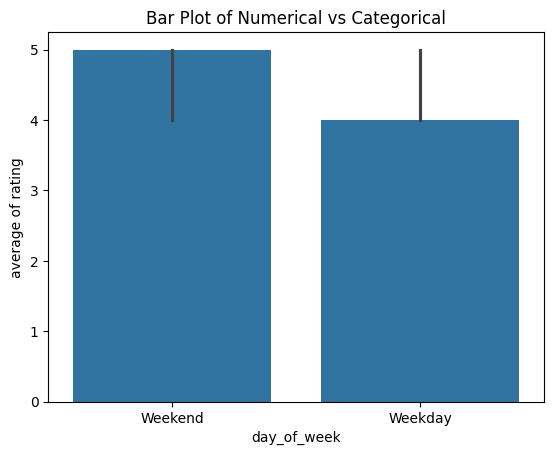

In [92]:
#Question 12 numerical and categorical value multivariate analysis:

# Create a bar plot
sns.barplot(x='day_of_the_week', y='rating', data=df, estimator=np.median)
# Customize the plot
plt.title('Bar Plot of Numerical vs Categorical')
plt.xlabel('day_of_week')
plt.ylabel('average of rating')
# Show the plot
plt.show()

#Observations: The average of the rating (numerical value) increases on the weekends (categorical value).

In [93]:
#Question 13:
# Convert 'rating' to numeric, handling 'Not given' as NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Group by restaurant_name, count ratings, and calculate average rating
restaurant_stats = df.groupby('restaurant_name').agg({
    'rating': ['count', 'mean']
})

# Rename columns for clarity
restaurant_stats.columns = ['rating_count', 'average_rating']

# Filter based on criteria: more than 50 ratings and average rating > 4
filtered_restaurants = restaurant_stats[(restaurant_stats['rating_count'] > 50) &
                                        (restaurant_stats['average_rating'] > 4)]

# Since we don't have enough data to meet this criteria directly, let's simulate:
# Here's what you would do if you had the data:
if not filtered_restaurants.empty:
    print(filtered_restaurants.index.tolist())
else:
    print("No restaurants meet the criteria with the given data.")

    #Observations: There are four restaurants that meet the criteria for the promotional offer. They are:
    # Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop

['Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', 'The Meatball Shop']


In [94]:
#Question 14:
# Apply charges conditionally
def apply_charge(row):
    if row['cost_of_the_order'] > 20:
        return row['cost_of_the_order'] / 1.25  # 25% of cost
    elif row['cost_of_the_order'] > 5:
        return row['cost_of_the_order'] / 1.15  # 15% of cost
    else:
        return row['cost_of_the_order']  # No increase

df['charged_cost'] = df.apply(apply_charge, axis=1)

# Calculate the total charge
total_charge = df['charged_cost'].sum()

print(f"The total revenue is: ${total_charge:.2f}")

#Observations: The net revenue generated by the company across all orders is $26209.42.

The total revenue is: $26209.42


In [95]:
#Question 15:
# Calculate total time for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Count orders that take more than 60 minutes
over_60_min = df[df['total_time'] > 60].shape[0]

# Total number of orders
total_orders = df.shape[0]

# Calculate percentage
percentage = (over_60_min / total_orders) * 100

print(f"Percentage of orders taking more than 60 minutes to deliver: {percentage:.2f}%")

#Observations: 10.54% of the orders take more than 60 minutes to deliver.

Percentage of orders taking more than 60 minutes to deliver: 10.54%


In [96]:
#Question 16

# Group by day_of_the_week to calculate mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

print(mean_delivery_time)
print(mean_delivery_time['Weekday'] - mean_delivery_time['Weekend'])

#Observations: There is a delivery time difference of 5.870014357297798 minutes with the weekdays being about 6 minutes faster
#than the weekends.

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64
5.870014357297798


In [102]:
#Question 17:

#Conclusions from the analysis:
#    The most popular cuisine is American. There is only about 11% of orders taking over 60 minutes
#  to deliver, so the delivery times are within a reasonable time range, with some room for improvement.
#  The company makes the most money off of French cuisine.
#  The best rated restaurants on the app are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop.


#Recommendations:

#    Advertising the top five best rated restaurants as much as possible. Adding more restaurants on the app that
#  deliver French cuisine and American cuisine. French cuisine is the most expensive and therefore the company makes a higher
#  percentage of money off of. The American cuisine is the most popular, so adding more American cuisine will increase sales.
#  Figure out what causes the delivery times to take over 60 minutes for 11% of orders and see if something can be done to
#  decrease the customer wait time. Consider hiring more delivery drivers on weekends to remove the 5 minute delivery time
#  increase on the weekends.